<a href="https://colab.research.google.com/github/robajo12/data301_predictive_analytics_machine_learning/blob/main/ml_projects/Quiz%2B1Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quiz 1 - Assignment

#### Analyze and build machine learning model for the given dataset

+ Research Questions - 10 pts
    + List your research questions (at least 3 questions)
    + Data info: Description about data source and reference

+ Data Acquisition - 10 pts
    + Information on dataset, data type (csv or other format) and research questions
    + Information on data collection techniques and details

+ Data Wrangling - 20 pts
    + Data Wrangling strategy for answering your research questions
    + Data Wrangling Code
    + Provide code and detailed analysis along with some statistical insights for your underlying data

+ EDA (Exploratory Data Analysis) - 15 pts
    + Plot graphs/ charts/figures and add your observation for each plot. Also provide some statistical insights/ interpretation for your graphs/ plots

+ Machine Learning Model - 30 pts
    + Build machine learning model
    + Evaluate the model
    + Select and optimize the model
    + Business justification for the ML model

+ Conclusion - 15 pts
    + Provide logical conclusion for your data analysis work aligning with your research questions
    + Final conclusion of your data analysis work


 ### Research question:
 #### How likely students who spend more time while studying are suceptible to pass? 
 #### Do students with low income are seceptible to spend more time in study?


### Data Acquisition

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Student-Pass-Fail-Data.csv')
data.head()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


In [ ]:
df.shape

(1000, 3)

In [ ]:
#show the missing data number
df.isnull().sum()

Self_Study_Daily    0
Tution_Monthly      0
Pass_Or_Fail        0
dtype: int64

### Exploratory Data Analysis

<AxesSubplot:xlabel='Pass_Or_Fail', ylabel='count'>

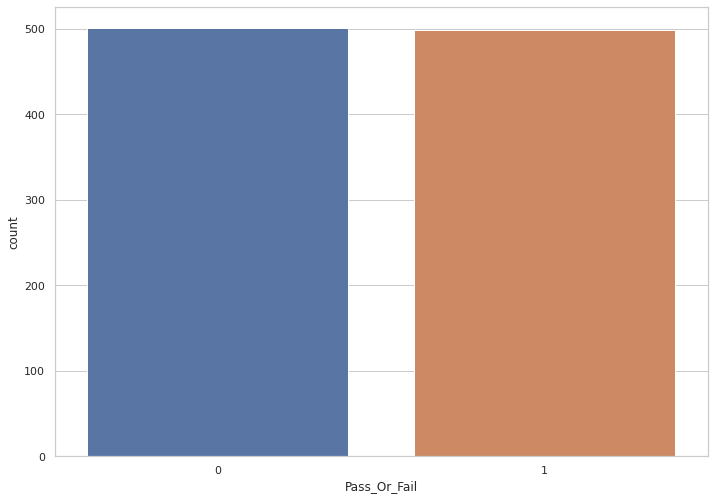

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Pass_Or_Fail', data=df)

In [ ]:
df.columns

Index(['Self_Study_Daily', 'Tution_Monthly', 'Pass_Or_Fail'], dtype='object')

<AxesSubplot:xlabel='Self_Study_Daily', ylabel='count'>

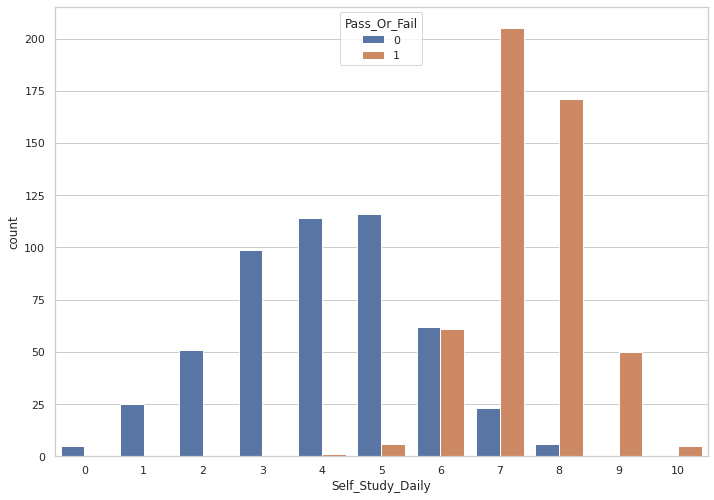

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Self_Study_Daily', hue='Pass_Or_Fail', data=df)

Observation: People that study at least six hours daily are most likely to pass while people who study less than six hours have almost no chance to pass.

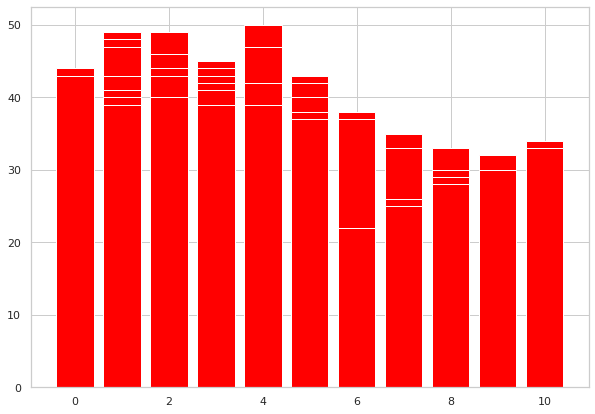

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(x=df['Self_Study_Daily'], height=df['Tution_Monthly'], color='red')
plt.show()

Observation: People those montly tuition is over fourty spend less time studying than those that monthly tuition is less. 

<AxesSubplot:>

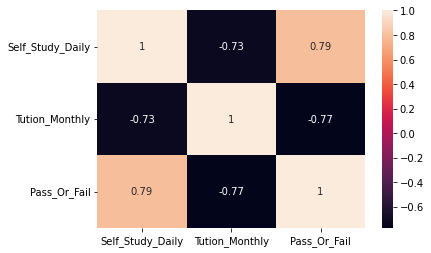

In [ ]:
sns.heatmap(df.corr(),annot=True)

Observation: There  is a strong positive correlation between self study daily and pass_or_fail rate.
             There is a negative correlation between the monthly tuition student pay and the sucess or fail rate.

In [ ]:
X = df[['Self_Study_Daily', 'Tution_Monthly']]
X.head()

,Self_Study_Daily,Tution_Monthly
0,7,27
1,2,43
2,7,26
3,8,29
4,3,42


In [ ]:
y=df[['Pass_Or_Fail']]
y.head()

,Pass_Or_Fail
0,1
1,0
2,1
3,1
4,0


### Building Machine Learning models

#### -- Logistic Regresion

In [ ]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(750, 2) (250, 2) (750, 1) (250, 1)


In [ ]:
logReg.fit(X_train,y_train)

/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = logReg.predict(X_test)


In [ ]:
y_test.values[0:10]

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1]])

In [ ]:
y_pred[0:10]

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
logReg.score(X_test,y_test)

0.984

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.984

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[128,   4],
       [  0, 118]])

Text(0.5, 1.0, 'Logistic Regression-Confusion Matrix')

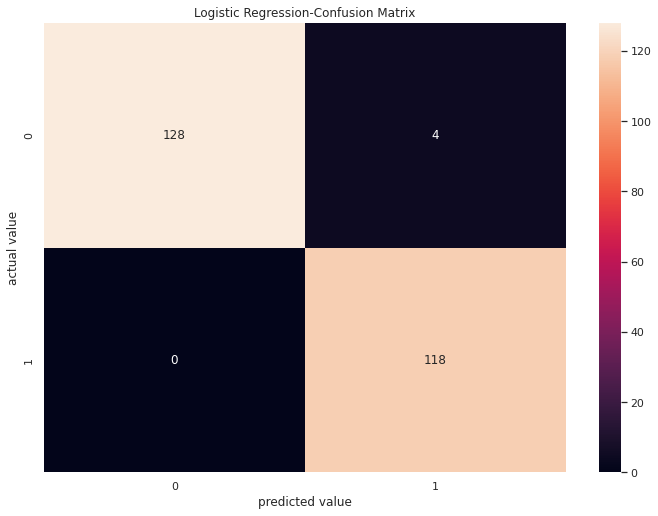

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='0.0f')
plt.ylabel('actual value')
plt.xlabel('predicted value')
plt.title(f'Logistic Regression-Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       132
           1       0.97      1.00      0.98       118

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



#### -- KNN Model

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [ ]:
scalar.fit(df.drop('Pass_Or_Fail', axis=1))

StandardScaler()

In [ ]:
scaled_features = scalar.transform(df.drop('Pass_Or_Fail', axis=1))

In [ ]:
std_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
std_df.head()

,Self_Study_Daily,Tution_Monthly
0,0.592449,-0.708143
1,-1.766025,1.970413
2,0.592449,-0.875553
3,1.064143,-0.373324
4,-1.294330,1.803004


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_features, df['Pass_Or_Fail'])
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(750, 2) (250, 2) (750,) (250,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)


In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_predict = knn.predict(x_test)
y_predict

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0])

In [ ]:
score = knn.score(x_test,y_test)
score

0.984

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[132,   2],
       [  2, 114]])

Text(0.5, 1.0, 'KNN-Confusion Matrix')

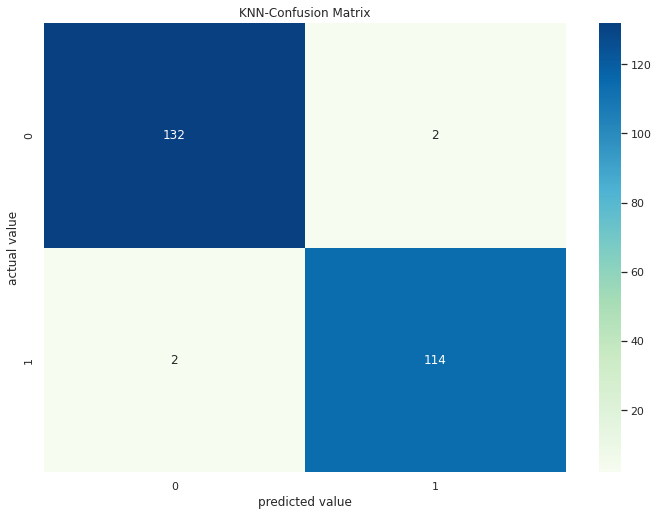

In [ ]:
sns.heatmap(cm,annot=True,fmt='0.0f',cmap='GnBu')
plt.ylabel('actual value')
plt.xlabel('predicted value')
plt.title(f'KNN-Confusion Matrix')

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       134
           1       0.98      0.98      0.98       116

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



## K value and Acuracy

In [ ]:
from sklearn import metrics
score = []

In [ ]:
for i in range(1,50):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  score.append(metrics.accuracy_score(y_test,y_predict))

print(score)

[0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984, 0.984]


Text(0, 0.5, 'Accuracy Score')

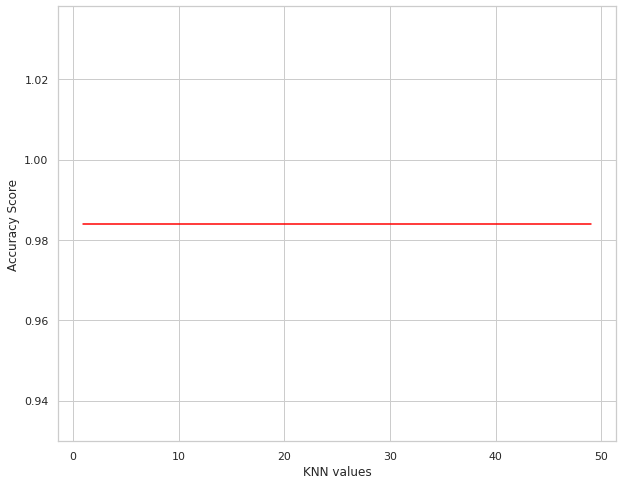

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50), score, color='red')
plt.xlabel('KNN values')
plt.ylabel('Accuracy Score')

In [ ]:
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i !=y_test))

(Text(0, 0.5, 'Eror Rate'),)

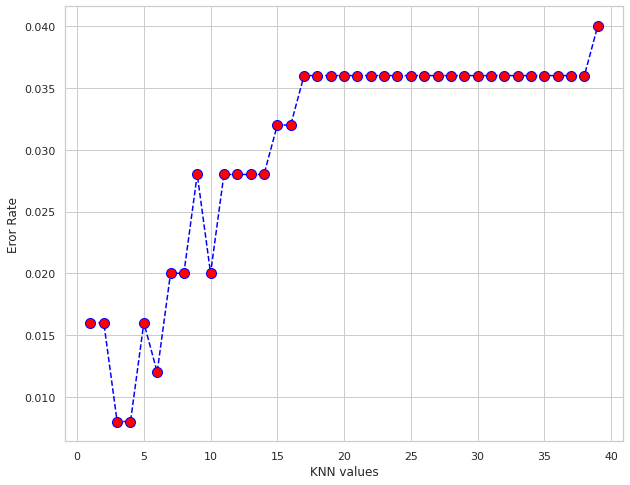

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize =10)
plt.xlabel('KNN values')
plt.ylabel('Eror Rate'), 

#### Conclusion:
    According to the result from the above the three models have similar outcomes.
    Logistic regression has a precision of 100% with 98% of accuracy and Knn Model has a precision of 99% with the same accuracy rate.
    So, both models are good since they make good prediction 
    KNN is the most efficient approach with best k value between 16 and 38.
    
    